# <center><u> P9 - Produisez une étude de marché 🐓</u></center>
## Première partie: Exploration, nettoyage et analyse des données
### Sommaire

[1.	Importation des bibliothèques](#1.-Importation-des-bibliothèques)

[2.	Importation, exploitation, traitements et analyse des datas frames](#2.-Importation,-exploitation,-traitements-et-analyse-des-datas-frames)

> [2.1. Data frames Disponibilité Alimentaire](#2.1.-Data-frames-Disponibilité-Alimentaire)

> [2.2. Data Frames Population](#2.2.-Data-Frames-Population)

> [2.3. Data Frames PIB](#2.3.-Data-Frames-PIB)

> [2.4. Data Frames Stabilité Politique](#2.4.-Data-Frames-Stabilité-Politique)

> [2.5. Data Frames Importation Poulet](#2.5.-Data-Frames-Importation-Poulet)

> [2.6. Data Frames Taxe sur le commerce international](#2.6.-Data-Frames-Taxe-sur-le-commerce-international)

> [2.7. Data Frames Utilisation internet](#2.7.-Data-Frames-Utilisation-internet)

> [2.8. Data Frames Distance entre La France et les autres pays](#2.8.-Data-Frames-Data-Frames-Distance-entre-La-France-et-les-autres-pays)



[3. Rapprochement des data frames](#3.-Rapprochement-des-data-frames)



[4. Exportation du Dataframes 'data_lapoule'](#4.-Exportation-du-Dataframes-'data_lapoule')

### 1.	Importation des bibliothèques

In [1]:
# Importation librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.	Importation, exploitation, traitements et analyse des datas frames

In [2]:
# Importation des datas frames

df_dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

df_population = pd.read_excel('Population_2000_2018.xlsx')

df_importation_poulet = pd.read_excel('Importation volaille.xlsx')

df_stablitite_pol = pd.read_excel('Stabilité politique.xlsx')

df_taxe_commerce_inter = pd.read_excel('Taxe commerce inter.xls')

df_pib = pd.read_excel('PIB par habitant.xlsx')

df_utilisation_internet = pd.read_excel('Utilisation internet.xls')

df_distance = pd.read_excel('distances.xlsx')

### 2.1. Data frames Disponibilité Alimentaire

In [3]:
# Aperçu du jeu de données et dimension

print(df_dispo_alim.shape)

df_dispo_alim.head()

(176600, 14)


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# Pivotage du data frames

df_dispo_alim = df_dispo_alim.pivot_table(index=['Zone', 'Produit'],
                                          columns=['Élément'], values='Valeur', aggfunc=sum).reset_index()

In [5]:
# Liste des colonnes de notre data frames

df_dispo_alim.columns

Index(['Zone', 'Produit', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [6]:
# Selection des colonnes

df_dispo_alim = df_dispo_alim[['Zone', 'Produit',
                               'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Nourriture',
                               'Importations - Quantité', 'Production']]

In [7]:
# Aperçu des types de données

df_dispo_alim.dtypes

Élément
Zone                                                         object
Produit                                                      object
Disponibilité alimentaire (Kcal/personne/jour)              float64
Disponibilité de protéines en quantité (g/personne/jour)    float64
Disponibilité intérieure                                    float64
Nourriture                                                  float64
Importations - Quantité                                     float64
Production                                                  float64
dtype: object

In [8]:
# Aperçu des valeurs manquantes

df_dispo_alim.isnull().sum()

Élément
Zone                                                           0
Produit                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              1571
Disponibilité de protéines en quantité (g/personne/jour)    1540
Disponibilité intérieure                                     142
Nourriture                                                  1549
Importations - Quantité                                      787
Production                                                  5713
dtype: int64

In [9]:
# Verification de l'existence de doublon

df_dispo_alim.duplicated().sum()

0

In [10]:
# Description du jeu de données

df_dispo_alim.describe()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Nourriture,Importations - Quantité,Production
count,14476.000000,14507.000000,15905.000000,14498.000000,15260.000000,10334.000000
mean,33.962697,0.962651,694.599246,361.499448,96.930079,1090.312948
std,106.684337,3.248910,9717.089024,5043.291136,962.950046,12420.669023
min,0.000000,0.000000,-828.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.030000,6.000000,4.000000,1.000000,15.000000
75%,20.000000,0.400000,75.000000,49.000000,18.000000,154.000000
max,1785.000000,48.680000,758548.000000,473967.000000,95538.000000,758548.000000


In [11]:
# Remplacement des valeurs nulles

df_dispo_alim = df_dispo_alim.fillna(0)

In [12]:
# Aperçu des valeurs manquantes

df_dispo_alim.isnull().sum()

Élément
Zone                                                        0
Produit                                                     0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Nourriture                                                  0
Importations - Quantité                                     0
Production                                                  0
dtype: int64

In [13]:
# Nouveau data frame ayant pour produit les lignes contenant les données sur les volailles

volaille = df_dispo_alim[df_dispo_alim['Produit'] == 'Viande de Volailles']

In [14]:
# Calcul des totaux des differentes colonnes pour les produits de type volaille

dispo_int_vol = volaille['Disponibilité intérieure']

alim_vol = volaille['Disponibilité alimentaire (Kcal/personne/jour)']

prot_vol = volaille['Disponibilité de protéines en quantité (g/personne/jour)']

import_vol = volaille['Importations - Quantité']

prod_vol = volaille['Production']

In [15]:
# Calcul des totaux des differentes colonnes

dispo_int = df_dispo_alim['Disponibilité intérieure'].sum()

alim_t = df_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

prot_t = df_dispo_alim['Disponibilité de protéines en quantité (g/personne/jour)'].sum()

import_t = df_dispo_alim['Importations - Quantité'].sum()

prod_t = df_dispo_alim['Production'].sum()

In [16]:
# Calcul de la proportion de volaille dans la disponibilité alimentaire

df_dispo_alim['Proportion volaille dispo'] = round(
    (dispo_int_vol*100)/dispo_int, 2)

df_dispo_alim['Proportion Kcal volaille'] = round((alim_vol*100)/alim_t, 2)

df_dispo_alim['Proportion proteine volaille'] = round((prot_vol*100)/prot_t, 2)

df_dispo_alim['Proportion import volaille'] = round(
    (import_vol*100)/import_t, 2)

df_dispo_alim['Proportion production volaille'] = round(
    (prod_vol*100)/prod_t, 2)

In [17]:
# Selection des lignes contenant les données sur les volailles

df_dispo_alim = df_dispo_alim[df_dispo_alim['Produit']
                              == 'Viande de Volailles']

In [18]:
# Nouvelle Selection des colonnes

df_dispo_alim = df_dispo_alim[['Zone', 'Proportion volaille dispo', 'Proportion Kcal volaille',
                           'Proportion proteine volaille',
                              'Proportion import volaille', 'Proportion production volaille']].reset_index()

df_dispo_alim.head()

Élément,index,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille
0,78,Afghanistan,0.00,0.00,0.00,0.00,0.00
1,173,Afrique du Sud,0.02,0.03,0.10,0.03,0.01
2,265,Albanie,0.00,0.02,0.04,0.00,0.00
3,357,Algérie,0.00,0.00,0.01,0.00,0.00
4,452,Allemagne,0.02,0.01,0.06,0.06,0.01


In [19]:
# Suppression de la colonne index

df_dispo_alim = df_dispo_alim.drop(columns='index')

In [20]:
# Renommage des quelques pays

liste1 = ['Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
          'Chine, continentale', 'Chine, Taiwan Province de']
liste2 = ['Hong-Kong', 'Macao', 'Chine', 'Taiwan']

df_dispo_alim['Zone'] = df_dispo_alim['Zone'].replace(liste1, liste2)

### 2.2. Data Frames Population

In [21]:
# Aperçu du jeu de données et dimension

print(df_population.shape)

df_population.head()

(4411, 15)


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [22]:
# Aperçu des types de données

df_population.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [23]:
# Aperçu des valeurs manquantes

df_population.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [24]:
# Verification de l'existence de doublon

df_population.duplicated().sum()

0

In [25]:
# Description du jeu de données

df_population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [26]:
# Conversion unité Valeur, de millier en million

df_population['Valeur'] = df_population['Valeur']*1000

In [27]:
# Renommage de la colonne Valeur en "Population"

df_population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [28]:
# Selection des colonnes

df_population = df_population[['Zone', 'Année', 'Population']]

In [29]:
# Selection de la population pour l'année 2012

pop_2012 = df_population[df_population['Année'] == 2012]

# Renommage de la colonne "Population" en "Population 2012"

pop_2012 = pop_2012.rename(columns={'Population': 'Population 2012'})

# Supression de la colonne 'Année'

pop_2012 = pop_2012.drop(columns='Année')

In [30]:
# Selection de l'année 2017

df_population = df_population[df_population['Année'] == 2017]

In [31]:
# Merge entre df pop_2012 et df_population

df_population = df_population.merge(pop_2012, on="Zone")

In [32]:
# Calcul de l'évolution de la population entre 2012 et 2017

a = df_population['Population']
d = df_population["Population 2012"]

df_population["Evolution Pop 2012-2017"] = round((a-d)/d*100, 2)

In [33]:
# Supression de la colonne "Population 2012"

df_population = df_population.drop(columns=['Population 2012','Année'])

df_population.head()

,Zone,Population,Evolution Pop 2012-2017
0,Afghanistan,36296113.0,16.48
1,Afrique du Sud,57009756.0,7.91
2,Albanie,2884169.0,-1.03
3,Algérie,41389189.0,10.71
4,Allemagne,82658409.0,2.08


### 2.3. Data Frames PIB

In [34]:
# Aperçu des types de données

df_pib.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [35]:
# Aperçu du jeu de données et dimension

print(df_pib.shape)

df_pib.head()

(387, 15)


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2012,2012,I$,2075.5,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2012,2012,I$,13946.9,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.3,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,8,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2012,2012,I$,11228.0,X,Ciffre de sources internationales,NaN


In [36]:
# Aperçu des valeurs manquantes

df_pib.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      387
dtype: int64

In [37]:
# Verification de l'existence de doublon

df_pib.duplicated().sum()

0

In [38]:
# Description du jeu de données

df_pib.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,387.000000,387.0,387.0,387.000000,387.000000,387.000000,0.0
mean,427.255814,6126.0,22013.0,2014.506460,2014.506460,20122.410749,NaN
std,251.714328,0.0,0.0,2.503228,2.503228,21754.467592,NaN
min,4.000000,6126.0,22013.0,2012.000000,2012.000000,773.600000,NaN
25%,208.000000,6126.0,22013.0,2012.000000,2012.000000,4383.100000,NaN
50%,422.000000,6126.0,22013.0,2017.000000,2017.000000,12584.100000,NaN
75%,638.000000,6126.0,22013.0,2017.000000,2017.000000,28219.650000,NaN
max,894.000000,6126.0,22013.0,2017.000000,2017.000000,149702.000000,NaN


In [39]:
# Selection des colonnes

df_pib = df_pib[['Zone', 'Année', 'Valeur']]

In [40]:
# Renommage de la colonne Valeur en "PIB/Habitant"

df_pib.rename(columns={'Valeur': 'PIB/Habitant $'}, inplace=True)

In [41]:
# Selection du PIB pour l'année 2012

pib_2012 = df_pib[df_pib['Année'] == 2012]

# Renommage de la colonne "PIB/Habitant $" en "PIB/Habitant $ 2012"

pib_2012 = pib_2012.rename(columns={'PIB/Habitant $': 'PIB/Habitant $ 2012'})

# Supression de la colonne 'Année'

pib_2012 = pib_2012.drop(columns='Année')

In [42]:
# Selection de l'année 2017

df_pib = df_pib[df_pib['Année'] == 2017]

In [43]:
# Merge entre df_pib et pib_2012

df_pib = df_pib.merge(pib_2012, on="Zone")

In [44]:
# Calcul de l'évolution du pib entre 2012 et 2017

a = df_pib['PIB/Habitant $']
d = df_pib["PIB/Habitant $ 2012"]

df_pib["Evolution PIB 2012-2017"] = round((a-d)/d*100, 2)

In [45]:
# Supression de la colonne "PIB/Habitant $ 2012"

df_pib = df_pib.drop(columns=['PIB/Habitant $ 2012', 'Année'])

df_pib.head()

,Zone,PIB/Habitant $,Evolution PIB 2012-2017
0,Afghanistan,2058.4,-0.82
1,Afrique du Sud,13860.3,-0.62
2,Albanie,12771.0,13.74
3,Algérie,11737.4,4.49
4,Allemagne,53071.5,6.41


In [46]:
# Renommage des quelques pays

liste1 = ['Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
          'Chine, continentale']
liste2 = ['Hong-Kong', 'Macao', 'Chine']

df_pib['Zone'] = df_pib['Zone'].replace(liste1, liste2)

### 2.4. Data Frames Stabilité Politique

In [47]:
# Aperçu du jeu de données et dimension

print(df_stablitite_pol.shape)

df_stablitite_pol.head()

(400, 15)


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2012,2012,indice,-2.42,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2012,2012,indice,-0.03,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2012,2012,indice,-0.14,X,Ciffre de sources internationales,NaN


In [48]:
# Aperçu des types de données

df_stablitite_pol.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [49]:
# Aperçu des valeurs manquantes

df_stablitite_pol.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      400
dtype: int64

In [50]:
# Verification de l'existence de doublon

df_stablitite_pol.duplicated().sum()

0

In [51]:
# Description du jeu de données

df_stablitite_pol.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,400.000000,400.0,400.0,400.000000,400.000000,400.000000,0.0
mean,428.400000,6125.0,21032.0,2014.500000,2014.500000,-0.057525,NaN
std,255.298773,0.0,0.0,2.503131,2.503131,0.987697,NaN
min,4.000000,6125.0,21032.0,2012.000000,2012.000000,-2.940000,NaN
25%,207.000000,6125.0,21032.0,2012.000000,2012.000000,-0.662500,NaN
50%,424.000000,6125.0,21032.0,2014.500000,2014.500000,0.035000,NaN
75%,649.250000,6125.0,21032.0,2017.000000,2017.000000,0.780000,NaN
max,894.000000,6125.0,21032.0,2017.000000,2017.000000,1.930000,NaN


In [52]:
# Selection des colonnes

df_stablitite_pol = df_stablitite_pol[['Zone', 'Année', 'Valeur']]

In [53]:
# Renommage de la colonne Valeur en "Indice stabilité politique"

df_stablitite_pol.rename(
    columns={'Valeur': 'Indice stabilité politique'}, inplace=True)

In [54]:
# Selection de la stabilité politique pour l'année 2012

stab_pol_2012 = df_stablitite_pol[df_stablitite_pol['Année'] == 2012]

# Renommage de la colonne "Indice stabilité politique" en "Indice stabilité politique 2012"

stab_pol_2012 = stab_pol_2012.rename(
    columns={'Indice stabilité politique': 'Indice stabilité politique 2012'})

# Supression de la colonne 'Année'

stab_pol_2012 = stab_pol_2012.drop(columns='Année')

In [55]:
# Selection de l'année 2017 pour la stablibité politique

df_stablitite_pol = df_stablitite_pol[df_stablitite_pol['Année'] == 2017]

In [56]:
# Merge entre stab_pol_2012 et df_stabilite_pol

df_stablitite_pol = df_stablitite_pol.merge(stab_pol_2012, on="Zone")

In [57]:
# Supression de la colonne "Indice stabilité politique 2012"

df_stablitite_pol = df_stablitite_pol.drop(
    columns=['Année', 'Indice stabilité politique 2012'])

df_stablitite_pol.head()

,Zone,Indice stabilité politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59


In [58]:
# Remplacement des valeurs manquantes par 0

df_stablitite_pol = df_stablitite_pol.fillna(0)

### 2.5. Data Frames Importation Poulet

In [59]:
# Aperçu du jeu de données et dimension

print(df_importation_poulet.shape)

df_importation_poulet.head()

(764, 14)


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2012,2012,1000 têtes,1094,A,Chiffre officiel
1,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2017,2017,1000 têtes,18970,A,Chiffre officiel
2,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2012,2012,1000 US$,1277,A,Chiffre officiel
3,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2017,2017,1000 US$,26227,A,Chiffre officiel
4,TCL,Cultures et produits animaux,710,Afrique du Sud,5609,Importations - Quantité,2151,Poulets,2012,2012,1000 têtes,392,A,Chiffre officiel


In [60]:
# Aperçu des types de données

df_importation_poulet.dtypes

Code Domaine              object
Domaine                   object
Code zone (M49)            int64
Zone                      object
Code Élément               int64
Élément                   object
Code Produit (CPC)         int64
Produit                   object
Code année                 int64
Année                      int64
Unité                     object
Valeur                     int64
Symbole                   object
Description du Symbole    object
dtype: object

In [61]:
# Aperçu des valeurs manquantes

df_importation_poulet.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone (M49)           0
Zone                      0
Code Élément              0
Élément                   0
Code Produit (CPC)        0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   2
Description du Symbole    2
dtype: int64

In [62]:
# Verification de l'existence de doublon

df_importation_poulet.duplicated().sum()

0

In [63]:
# Description du jeu de données

df_importation_poulet.describe()

,Code zone (M49),Code Élément,Code Produit (CPC),Code année,Année,Valeur
count,764.000000,764.000000,764.0,764.000000,764.000000,764.000000
mean,433.073298,5615.517016,2151.0,2014.539267,2014.513089,10893.085079
std,254.250730,6.504236,0.0,2.501329,2.501603,47885.009683
min,4.000000,5609.000000,2151.0,2012.000000,2012.000000,0.000000
25%,208.000000,5609.000000,2151.0,2012.000000,2012.000000,93.500000
50%,427.000000,5622.000000,2151.0,2017.000000,2017.000000,964.000000
75%,670.000000,5622.000000,2151.0,2017.000000,2017.000000,5097.500000
max,894.000000,5622.000000,2151.0,2017.000000,2017.000000,787855.000000


In [64]:
# Selection des lignes pour les importations de poulet

df_importation_poulet = df_importation_poulet[df_importation_poulet['Élément']
                                              == 'Importations - Valeur']

In [65]:
# Selection des colonnes

df_importation_poulet = df_importation_poulet[['Zone', 'Année', 'Valeur']]

In [66]:
# Renommage de la colonne Valeur en "Montant importation $"

df_importation_poulet.rename(
    columns={'Valeur': 'Montant importation poulet 1000$'}, inplace=True)

In [67]:
# Selection des importations pour l'année 2012

import_poulet_2012 = df_importation_poulet[df_importation_poulet['Année'] == 2012]

# Renommage de la colonne "Montant importation poulet 1000$" en "Montant importation poulet 1000$ 2012"

import_poulet_2012 = import_poulet_2012.rename(
    columns={'Montant importation poulet 1000$': 'Montant importation poulet 1000$ 2012'})

# Supression de la colonne 'Année'

import_poulet_2012 = import_poulet_2012.drop(columns='Année')

In [68]:
# Selection des importations pour l'année 2017

df_importation_poulet = df_importation_poulet[df_importation_poulet['Année'] == 2017]

In [69]:
# Merge entre import_poulet_2012 et df_importation_poulet

df_importation_poulet = df_importation_poulet.merge(
    import_poulet_2012, on="Zone")

In [70]:
# Supression de la colonne "Montant importation poulet 1000$ 2012"

df_importation_poulet = df_importation_poulet.drop(
    columns=['Montant importation poulet 1000$ 2012', 'Année'])

In [71]:
# Remplacement des valeurs manquantes par 0

df_importation_poulet = df_importation_poulet.fillna(0)

### 2.6. Data Frames Taxe sur le commerce international

In [72]:
# Aperçu du jeu de données et dimension

print(df_taxe_commerce_inter.shape)

df_taxe_commerce_inter.head()

(264, 3)


,Zone,2012,2017
0,Afghanistan,4.224652,7.422589
1,Angola,2.513808,3.628489
2,Albanie,3.890822,1.586931
3,Andorre,NaN,NaN
4,Le monde arabe,NaN,NaN


In [73]:
# Aperçu des types de données

df_taxe_commerce_inter.dtypes

Zone     object
2012    float64
2017    float64
dtype: object

In [74]:
# Aperçu des valeurs manquantes

df_taxe_commerce_inter.isnull().sum()

Zone     0
2012    97
2017    84
dtype: int64

In [75]:
# Verification de l'existence de doublon

df_taxe_commerce_inter.duplicated().sum()

0

In [76]:
# Remplacement des valeurs nulles

df_taxe_commerce_inter = df_taxe_commerce_inter.fillna(0)

In [77]:
# Renommage des colonnes

df_taxe_commerce_inter = df_taxe_commerce_inter.rename(
    columns={'2012': 'Taxe commerce inter 2012', '2017': 'Taxe commerce inter'})

In [79]:
# Round autour de la colonne 'Taxe commerce inter'

df_taxe_commerce_inter['Taxe commerce inter'] = round(
    df_taxe_commerce_inter['Taxe commerce inter'], 2)

# Supression de la colonne "Taxe commerce inter 2012"

df_taxe_commerce_inter = df_taxe_commerce_inter.drop(
    columns='Taxe commerce inter 2012')

In [80]:
# Remplacement des valeurs nulles

df_taxe_commerce_inter = df_taxe_commerce_inter.fillna(0)

### 2.7. Data Frames Utilisation internet

In [81]:
# Aperçu du jeu de données et dimension

print(df_utilisation_internet.shape)

df_utilisation_internet.head()

(264, 3)


,Zone,2012,2017
0,Aruba,74.000000,97.170000
1,Afghanistan,5.454545,13.500000
2,Angola,7.700000,26.000000
3,Albanie,49.400000,62.400000
4,Andorre,82.700000,91.567467


In [82]:
# Aperçu des types de données

df_taxe_commerce_inter.dtypes

Zone                    object
Taxe commerce inter    float64
dtype: object

In [83]:
# Aperçu des valeurs manquantes

df_utilisation_internet.isnull().sum()

Zone     0
2012    15
2017    12
dtype: int64

In [84]:
# Verification de l'existence de doublon

df_utilisation_internet.duplicated().sum()

0

In [85]:
# Remplacement des valeurs nulles

df_utilisation_internet = df_utilisation_internet.fillna(0)

In [86]:
# Renommage des colonnes

df_utilisation_internet = df_utilisation_internet.rename(
    columns={'2012': 'Taux utilisation internet 2012', '2017': 'Taux utilisation internet'})

In [88]:
# Round autour de la colonne 'Taux utilisation internet'

df_utilisation_internet['Taux utilisation internet'] = round(
    df_utilisation_internet['Taux utilisation internet'], 2)

# Supression de la colonne "Taxe commerce inter 2012"

df_utilisation_internet = df_utilisation_internet.drop(
    columns='Taux utilisation internet 2012')

In [89]:
# Remplacement des valeurs nulles

df_utilisation_internet = df_utilisation_internet.fillna(0)

### 2.8. Data Frames Distance entre La France et les autres pays

In [90]:
# Aperçu du jeu de données et dimension

print(df_distance.shape)
df_distance['Distance'] = round(df_distance['Distance'],2)

df_distance.head()

(199, 2)


,Zone,Distance
0,Afghanistan,5594.22
1,Angola,6478.95
2,Albanie,1603.94
3,Andorre,708.21
4,Émirats arabes unis,5251.80


In [91]:
# Aperçu des valeurs manquantes

df_distance.isnull().sum()

Zone        0
Distance    0
dtype: int64

In [92]:
# Description du jeu de données

df_distance.describe()

,Distance
count,199.000000
mean,6295.125226
std,4155.120717
min,0.000000
25%,3172.695000
50%,5786.760000
75%,8823.755000
max,18540.080000


### 3. Rapprochement des data frames

In [93]:
# Merge entre df_dispo_alim et df_population

df1 = pd.merge(df_dispo_alim, df_population, on="Zone", how='left')

In [94]:
# Merge entre df1 et df_pib

df2 = pd.merge(df1, df_pib, on="Zone", how='left')

In [95]:
# Merge entre df2 et df_stablitite_pol

df3 = pd.merge(df2, df_stablitite_pol, on="Zone", how='left')

In [96]:
# Merge entre df3 et df_importation_poulet

df4 = pd.merge(df3, df_importation_poulet, on="Zone", how='left')

In [97]:
# Merge entre df4 et df_taxe_commerce_inter

df5 = pd.merge(df4, df_taxe_commerce_inter, on="Zone", how='left')

In [98]:
# Merge entre df5 et df_utilisation_internet

df6 = pd.merge(df5, df_utilisation_internet, on="Zone", how='left')

In [99]:
# Merge entre df6 et df_distance

data_lapoule = pd.merge(df6, df_distance, on='Zone', how='left')

In [100]:
# Aperçu du jeu de données et dimension

print(data_lapoule.shape)

data_lapoule.head()

(172, 15)


,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Population,Evolution Pop 2012-2017,PIB/Habitant $,Evolution PIB 2012-2017,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance
0,Afghanistan,0.00,0.00,0.00,0.00,0.00,36296113.0,16.48,2058.4,-0.82,-2.80,26227.0,7.42,13.50,5594.22
1,Afrique du Sud,0.02,0.03,0.10,0.03,0.01,57009756.0,7.91,13860.3,-0.62,-0.28,7394.0,3.17,56.17,9306.64
2,Albanie,0.00,0.02,0.04,0.00,0.00,2884169.0,-1.03,12771.0,13.74,0.38,3266.0,1.59,62.40,1603.94
3,Algérie,0.00,0.00,0.01,0.00,0.00,41389189.0,10.71,11737.4,4.49,-0.92,19051.0,0.00,47.69,1345.46
4,Allemagne,0.02,0.01,0.06,0.06,0.01,82658409.0,2.08,53071.5,6.41,0.59,193759.0,0.00,84.39,880.63


In [101]:
# Aperçu des types de données

data_lapoule.dtypes

Zone                                 object
Proportion volaille dispo           float64
Proportion Kcal volaille            float64
Proportion proteine volaille        float64
Proportion import volaille          float64
Proportion production volaille      float64
Population                          float64
Evolution Pop 2012-2017             float64
PIB/Habitant $                      float64
Evolution PIB 2012-2017             float64
Indice stabilité politique          float64
Montant importation poulet 1000$    float64
Taxe commerce inter                 float64
Taux utilisation internet           float64
Distance                            float64
dtype: object

In [102]:
# Aperçu des valeurs manquantes

data_lapoule.isnull().sum()

Zone                                0
Proportion volaille dispo           0
Proportion Kcal volaille            0
Proportion proteine volaille        0
Proportion import volaille          0
Proportion production volaille      0
Population                          0
Evolution Pop 2012-2017             0
PIB/Habitant $                      0
Evolution PIB 2012-2017             0
Indice stabilité politique          0
Montant importation poulet 1000$    1
Taxe commerce inter                 0
Taux utilisation internet           0
Distance                            0
dtype: int64

In [103]:
# Verification de l'existence de doublon

data_lapoule.duplicated().sum()

0

In [104]:
# Remplacement des valeurs nulles par la moyenne

data_lapoule['Montant importation poulet 1000$'] = data_lapoule['Montant importation poulet 1000$'].fillna(data_lapoule['Montant importation poulet 1000$'].mean())

In [105]:
# Description du jeu de données

data_lapoule.describe()

,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Population,Evolution Pop 2012-2017,PIB/Habitant $,Evolution PIB 2012-2017,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.005465,0.014419,0.050988,0.005581,0.005756,4.284175e+07,7.021860,20060.234302,9.933663,-0.063081,14539.742690,4.460581,52.859128,5996.891628
std,0.019863,0.013032,0.040359,0.012806,0.021925,1.530637e+08,6.555715,20489.646465,14.027408,0.893090,64204.262069,6.765433,27.817137,3850.976817
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.204500e+04,-7.030000,893.700000,-33.800000,-2.940000,0.000000,-0.020000,0.000000,0.000000
25%,0.000000,0.000000,0.017500,0.000000,0.000000,2.874480e+06,2.325000,5008.675000,2.870000,-0.622500,400.750000,0.000000,25.667500,2839.707500
50%,0.000000,0.010000,0.050000,0.000000,0.000000,9.757833e+06,6.005000,13265.700000,9.550000,0.000000,3083.000000,1.195000,56.660000,5577.585000
75%,0.000000,0.020000,0.070000,0.010000,0.000000,3.013874e+07,11.515000,28622.075000,17.432500,0.650000,8800.750000,6.320000,77.760000,8738.407500
max,0.170000,0.050000,0.200000,0.070000,0.190000,1.421022e+09,33.390000,126144.000000,87.220000,1.600000,787855.000000,32.480000,98.260000,18540.080000


In [106]:
# Matrice de corrélation

data_lapoule.corr()

,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Population,Evolution Pop 2012-2017,PIB/Habitant $,Evolution PIB 2012-2017,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance
Proportion volaille dispo,1.000000,0.186306,0.179247,0.263331,0.985511,0.657010,-0.115899,0.107367,0.059914,-0.048759,0.033332,-0.093406,0.131314,0.078322
Proportion Kcal volaille,0.186306,1.000000,0.944512,0.149212,0.199050,-0.077616,-0.361126,0.393388,-0.131327,0.431778,-0.022663,-0.080253,0.499432,0.177546
Proportion proteine volaille,0.179247,0.944512,1.000000,0.209909,0.190475,-0.089157,-0.368180,0.492959,-0.117006,0.466537,0.031452,-0.107732,0.577324,0.083203
Proportion import volaille,0.263331,0.149212,0.209909,1.000000,0.211917,0.157987,-0.099709,0.310516,-0.056298,0.072588,0.326381,-0.170887,0.311378,-0.077229
Proportion production volaille,0.985511,0.199050,0.190475,0.211917,1.000000,0.613722,-0.120952,0.114529,0.041864,-0.030029,0.057331,-0.092706,0.141260,0.070328
Population,0.657010,-0.077616,-0.089157,0.157987,0.613722,1.000000,-0.043000,-0.050125,0.200479,-0.137379,0.024366,-0.024895,-0.068303,0.075434
Evolution Pop 2012-2017,-0.115899,-0.361126,-0.368180,-0.099709,-0.120952,-0.043000,1.000000,-0.288422,-0.217058,-0.402988,-0.139165,0.187669,-0.456786,0.153008
PIB/Habitant $,0.107367,0.393388,0.492959,0.310516,0.114529,-0.050125,-0.288422,1.000000,-0.081269,0.557539,0.217924,-0.293238,0.758147,-0.262791
Evolution PIB 2012-2017,0.059914,-0.131327,-0.117006,-0.056298,0.041864,0.200479,-0.217058,-0.081269,1.000000,0.089641,-0.019548,0.070928,-0.003854,-0.010586
Indice stabilité politique,-0.048759,0.431778,0.466537,0.072588,-0.030029,-0.137379,-0.402988,0.557539,0.089641,1.000000,0.105148,-0.039381,0.510811,0.072913


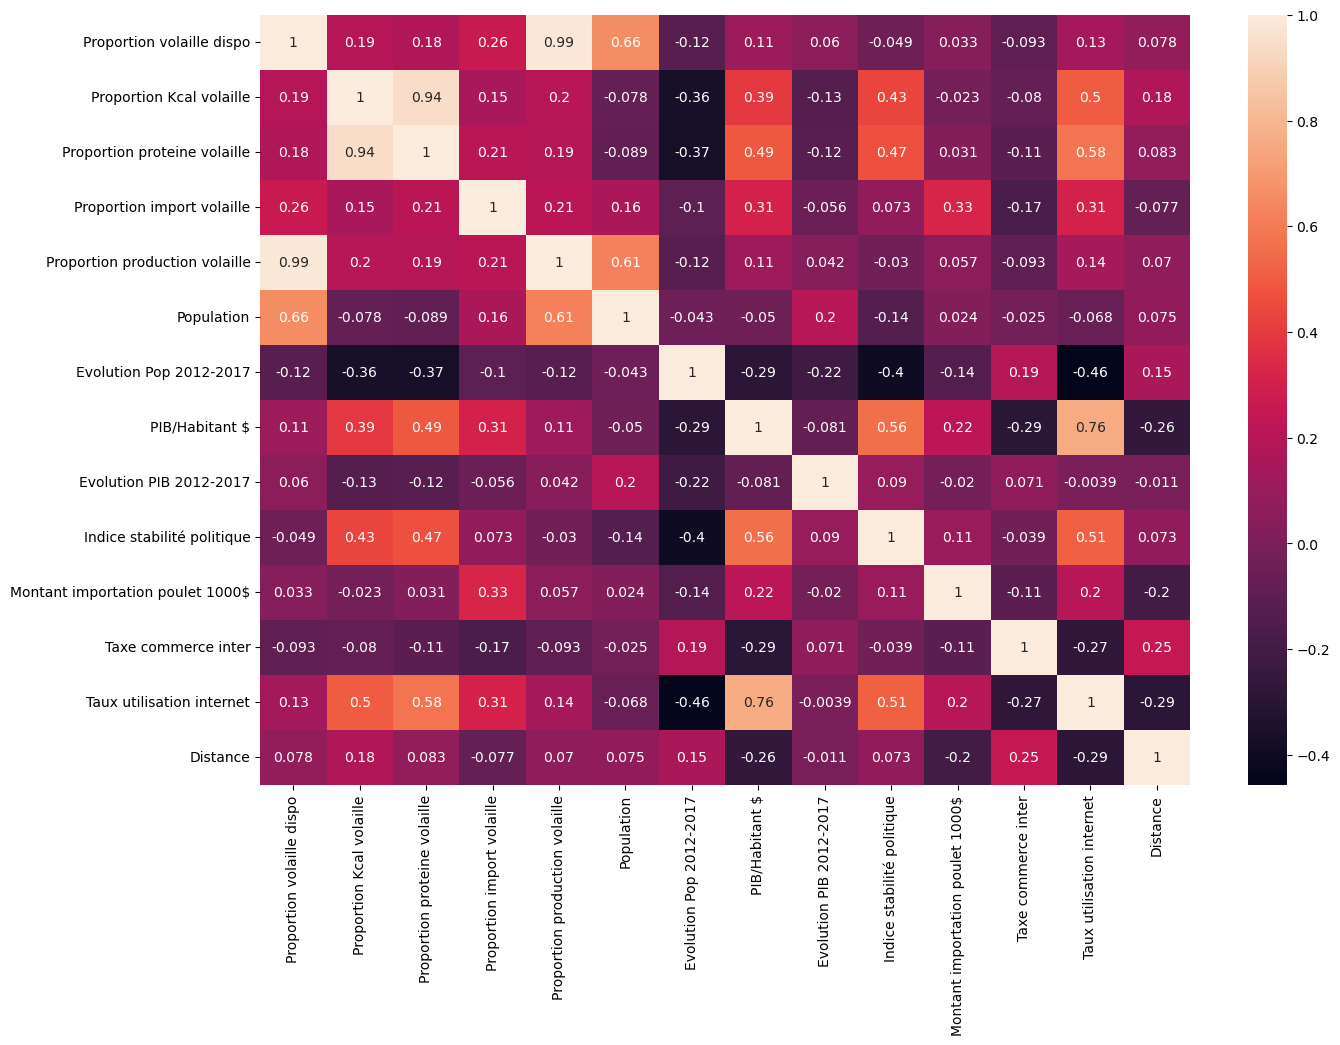

In [107]:
# Heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(data_lapoule.corr(), annot=True);

In [108]:
# Création d'un data frames sans la colonne Population pour afficher un boxplot
# La colonne Population, PIB et montant des importation car , elles comportent des fortes valeurs, ce qui risquait de ne pas nous permettre de bien observer les autres valeurs

data_lapoule_boxplot = data_lapoule.drop(columns=['Population','PIB/Habitant $','Montant importation poulet 1000$','Distance'])

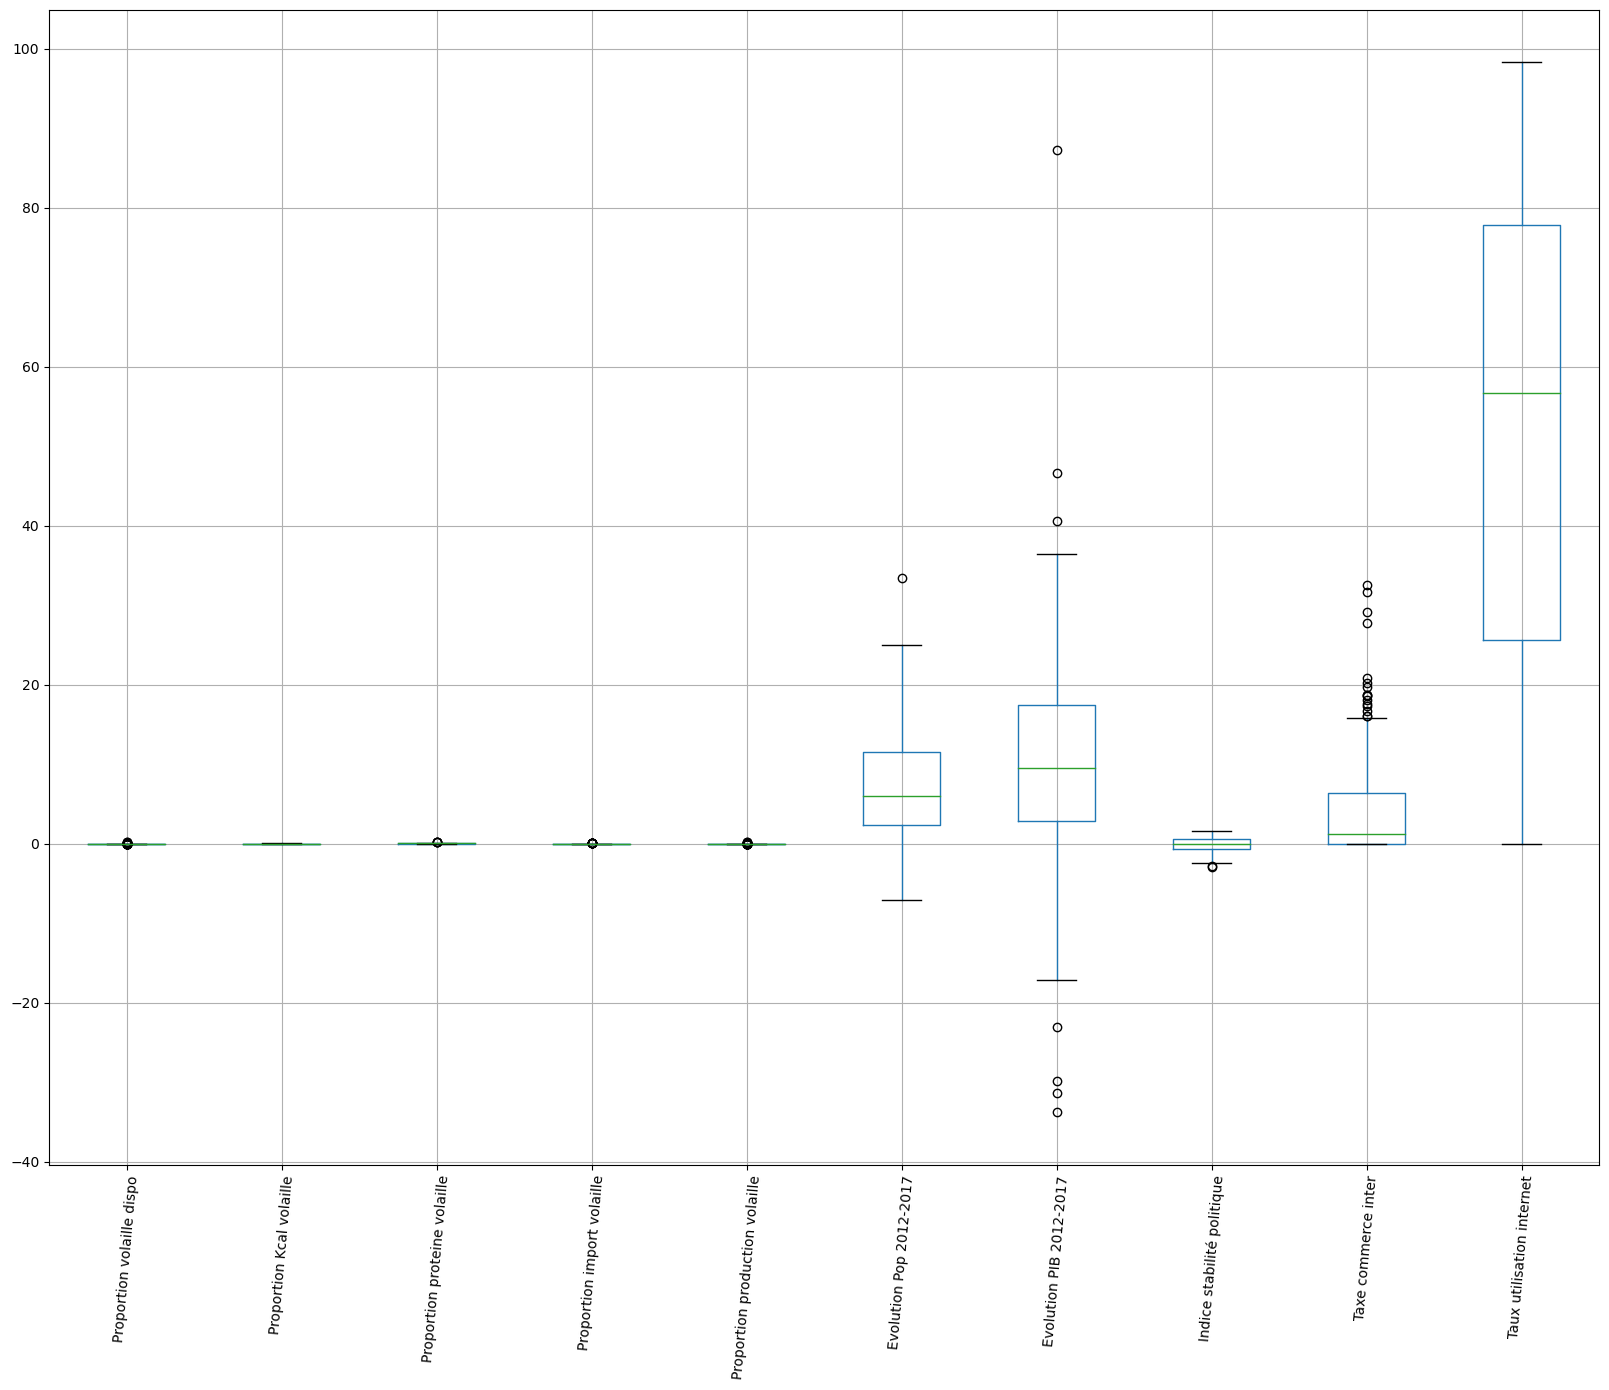

In [109]:
# Aperçu de la distribution des variables

plt.figure(figsize=(20, 15))

data_lapoule_boxplot.boxplot()
plt.xticks(rotation=85)
plt.show()

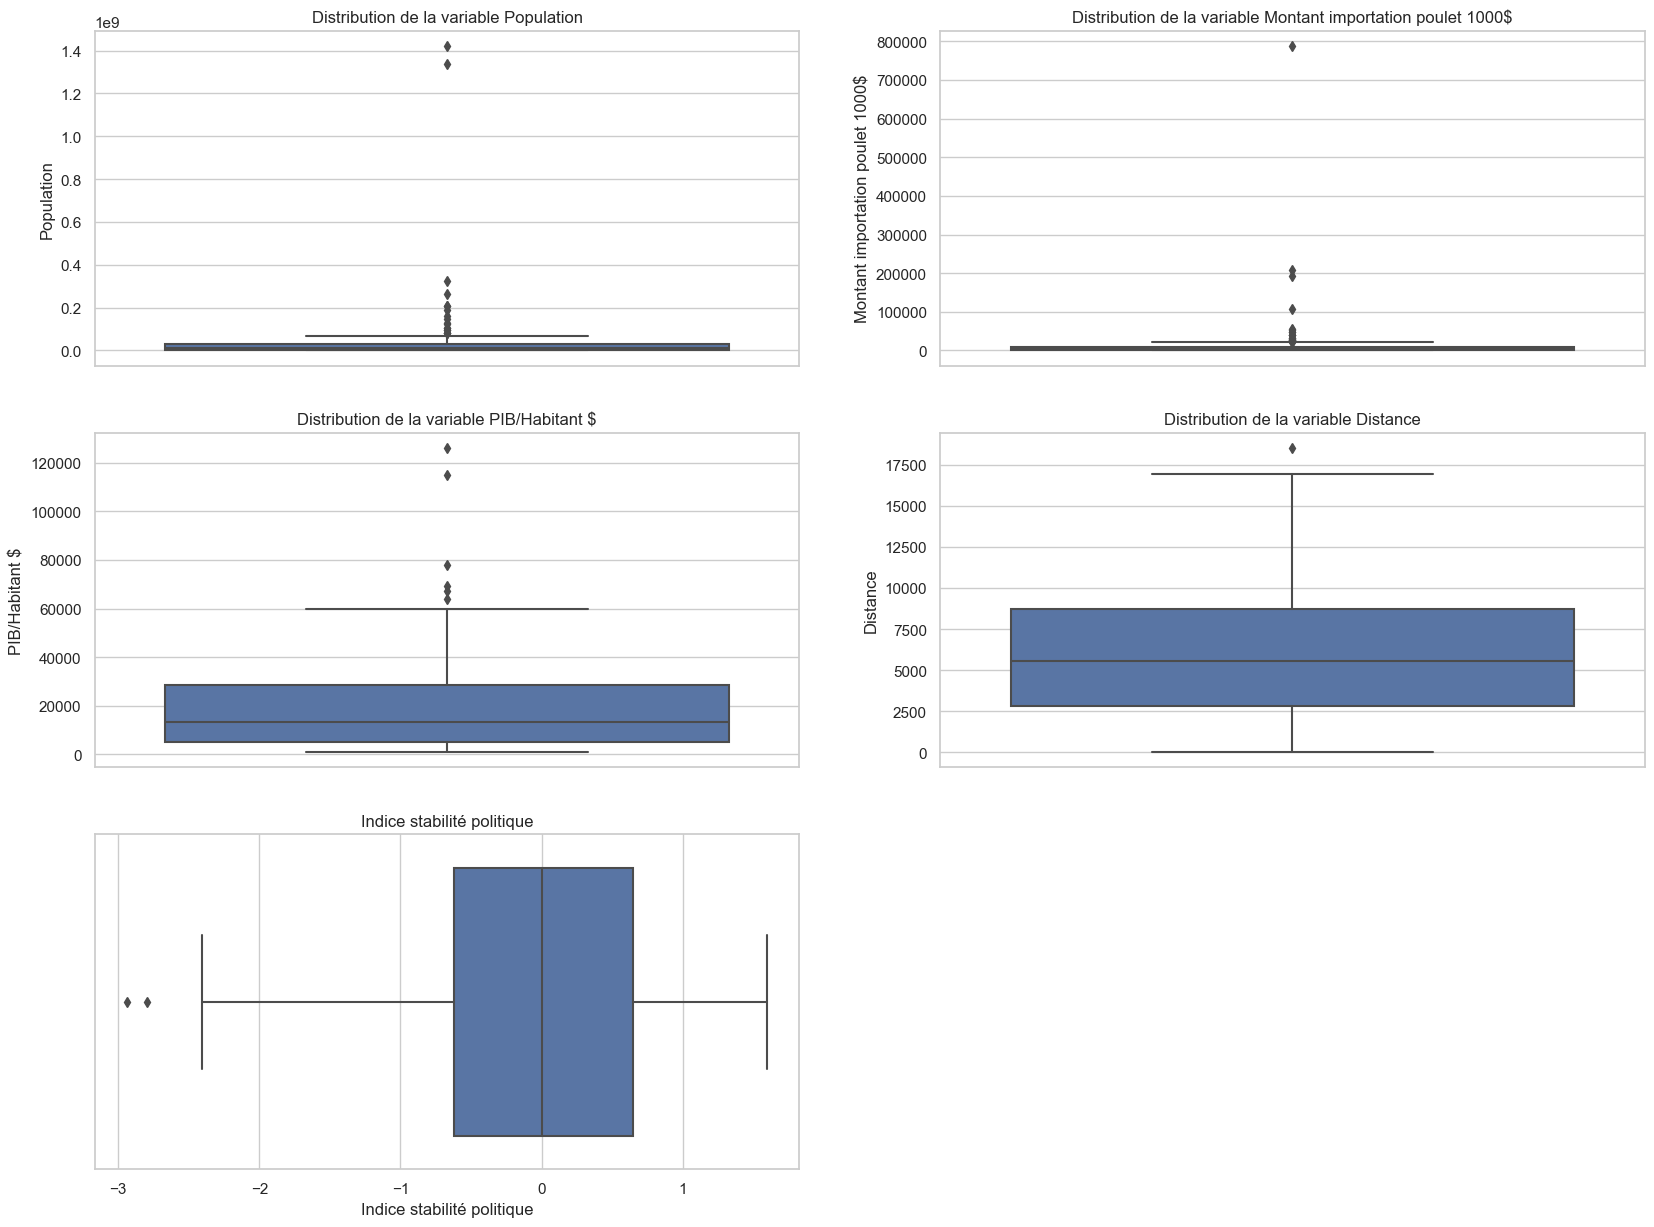

In [132]:
# Aperçu des Boxplot

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Distribution de la variable Population

plt.subplot(421)
sns.boxplot(data=data_lapoule, y='Population', x=None)
plt.title('Distribution de la variable Population')

# Distribution de la variable Montant importation poulet 1000$

plt.subplot(422)
sns.boxplot(data=data_lapoule, x=None, y='Montant importation poulet 1000$')
plt.title('Distribution de la variable Montant importation poulet 1000$')

# Distribution de la variable PIB/Habitant $

plt.subplot(423)
sns.boxplot(data=data_lapoule, x=None, y='PIB/Habitant $')
plt.title('Distribution de la variable PIB/Habitant $')

# Distribution de la variable Distance

plt.subplot(424)
sns.boxplot(data=data_lapoule, x=None, y='Distance')
plt.title('Distribution de la variable Distance')


# Distribution de la variable Indice stabilité politique

plt.subplot(425)
sns.boxplot(data=data_lapoule, x='Indice stabilité politique')
plt.title('Indice stabilité politique')

plt.show()

In [113]:
# Top 10 des pays les plus peuplés

data_lapoule.sort_values('Population', ascending=False)[
    ['Zone', 'Population']].head(10)

,Zone,Population
34,Chine,1.421022e+09
66,Inde,1.338677e+09
169,États-Unis d'Amérique,3.250848e+08
67,Indonésie,2.646510e+08
114,Pakistan,2.079062e+08
21,Brésil,2.078338e+08
106,Nigéria,1.908732e+08
14,Bangladesh,1.596854e+08
52,Fédération de Russie,1.455301e+08
75,Japon,1.275027e+08


In [114]:
# Top 10 des pays les moins peuplés

data_lapoule.sort_values('Population', ascending=True)[
    ['Zone', 'Population']].head(10)

,Zone,Population
133,Saint-Kitts-et-Nevis,52045.0
44,Dominique,71458.0
6,Antigua-et-Barbuda,95426.0
134,Saint-Vincent-et-les Grenadines,109827.0
56,Grenade,110874.0
80,Kiribati,114158.0
135,Sainte-Lucie,180954.0
136,Samoa,195352.0
137,Sao Tomé-et-Principe,207089.0
120,Polynésie française,276102.0


In [115]:
# Top 10 des pays ayant les pib les plus hauts

data_lapoule.sort_values('PIB/Habitant $', ascending=False)[
    ['Zone', 'PIB/Habitant $']].head(10)

,Zone,PIB/Habitant $
32,Macao,126144.0
87,Luxembourg,114986.0
70,Irlande,77749.2
144,Suisse,69103.6
167,Émirats arabes unis,67183.6
107,Norvège,64050.8
169,États-Unis d'Amérique,59914.8
31,Hong-Kong,59842.2
71,Islande,55638.5
42,Danemark,55356.7


In [116]:
# Top 10 des pays ayant les pib les plus faibles

data_lapoule.sort_values('PIB/Habitant $', ascending=True)[
    ['Zone', 'PIB/Habitant $']].head(10)

,Zone,PIB/Habitant $
163,Yémen,893.7
126,République centrafricaine,912.8
105,Niger,1163.2
131,République populaire démocratique de Corée,1235.0
101,Mozambique,1283.7
91,Malawi,1472.1
85,Libéria,1564.2
89,Madagascar,1584.4
149,Tchad,1587.0
139,Sierra Leone,1633.7


In [117]:
# Top 10 des pays ayant les plus proches de la France

data_lapoule.sort_values('Distance', ascending=True)[
    ['Zone', 'Distance']].head(11)

,Zone,Distance
51,France,0.00
16,Belgique,264.60
87,Luxembourg,287.97
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,344.14
117,Pays-Bas,430.89
144,Suisse,490.31
70,Irlande,780.84
4,Allemagne,880.63
150,Tchéquie,884.67
141,Slovénie,966.95


In [118]:
# Top 10 des pays ayant les plus éloignés de la France

data_lapoule.sort_values('Distance', ascending=False)[
    ['Zone', 'Distance']].head(10)

,Zone,Distance
109,Nouvelle-Zélande,18540.08
10,Australie,16957.68
49,Fidji,16579.28
160,Vanuatu,16329.38
136,Samoa,16083.47
171,Îles Salomon,15164.48
120,Polynésie française,14930.66
80,Kiribati,14371.44
152,Timor-Leste,13117.53
32,Macao,11966.80


In [119]:
# Top 10 des pays les plus stables politiquement

data_lapoule.sort_values('Indice stabilité politique', ascending=False)[
    ['Zone', 'Indice stabilité politique']].head(10)

,Zone,Indice stabilité politique
109,Nouvelle-Zélande,1.60
32,Macao,1.43
71,Islande,1.35
87,Luxembourg,1.33
144,Suisse,1.26
94,Malte,1.25
44,Dominique,1.20
136,Samoa,1.18
107,Norvège,1.17
121,Portugal,1.12


In [120]:
# Top 10 des pays les moins stables politiquement

data_lapoule.sort_values('Indice stabilité politique', ascending=True)[
    ['Zone', 'Indice stabilité politique']].head(10)

,Zone,Indice stabilité politique
163,Yémen,-2.94
0,Afghanistan,-2.80
114,Pakistan,-2.41
69,Iraq,-2.31
126,République centrafricaine,-2.01
106,Nigéria,-2.00
142,Soudan,-1.98
93,Mali,-1.91
158,Ukraine,-1.87
157,Turquie,-1.79


In [121]:
# Top 10 des pays ayant les taux les plus élevés de taxe sur le commerce international

data_lapoule.sort_values('Taxe commerce inter', ascending=False)[
    ['Zone', 'Taxe commerce inter']].head(10)

,Zone,Taxe commerce inter
103,Namibie,32.48
20,Botswana,31.72
135,Sainte-Lucie,29.18
41,Côte d'Ivoire,27.80
13,Bahamas,20.83
143,Sri Lanka,20.19
171,Îles Salomon,19.72
170,Éthiopie,18.74
49,Fidji,18.70
118,Philippines,18.53


In [122]:
# Top 10 des pays ayant les taux les plus bas de taxe sur le commerce international

data_lapoule.sort_values('Taxe commerce inter', ascending=True)[
    ['Zone', 'Taxe commerce inter']].head(11)

,Zone,Taxe commerce inter
39,Croatie,-0.02
51,France,-0.01
85,Libéria,0.00
81,Koweït,0.00
148,Tadjikistan,0.00
149,Tchad,0.00
75,Japon,0.00
150,Tchéquie,0.00
73,Italie,0.00
70,Irlande,0.00


In [123]:
# Top 10 des pays ayant les montants les plus élevés en terme d'importation de volaille

data_lapoule.sort_values('Montant importation poulet 1000$', ascending=False)[
    ['Zone', 'Montant importation poulet 1000$']].head(10)

,Zone,Montant importation poulet 1000$
117,Pays-Bas,787855.0
16,Belgique,207538.0
4,Allemagne,193759.0
119,Pologne,106814.0
65,Hongrie,54418.0
29,Canada,52627.0
46,Espagne,48616.0
123,Roumanie,46612.0
158,Ukraine,41215.0
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,39531.0


In [124]:
# Top 10 des pays ayant les montants les plus faibles en terme d'importation de volaille

data_lapoule.sort_values('Montant importation poulet 1000$', ascending=True)[
    ['Zone', 'Montant importation poulet 1000$']].head(10)

,Zone,Montant importation poulet 1000$
171,Îles Salomon,0.0
131,République populaire démocratique de Corée,0.0
118,Philippines,0.0
109,Nouvelle-Zélande,0.0
80,Kiribati,0.0
71,Islande,0.0
43,Djibouti,0.0
40,Cuba,0.0
15,Barbade,0.0
10,Australie,0.0


In [125]:
# Top 10 des pays ayant les plus hauts taux d'utilisation d'internet au niveau de leur population

data_lapoule.sort_values('Taux utilisation internet', ascending=False)[
    ['Zone', 'Taux utilisation internet']].head(10)

,Zone,Taux utilisation internet
71,Islande,98.26
81,Koweït,98.00
87,Luxembourg,97.36
42,Danemark,97.10
107,Norvège,96.36
127,République de Corée,95.07
167,Émirats arabes unis,94.82
7,Arabie saoudite,94.18
117,Pays-Bas,93.20
146,Suède,93.01


In [126]:
# Top 10 des pays ayant les plus faibles taux d'utilisation d'internet au niveau de leur population

data_lapoule.sort_values('Taux utilisation internet', ascending=True)[
    ['Zone', 'Taux utilisation internet']].head(10)

,Zone,Taux utilisation internet
131,République populaire démocratique de Corée,0.00
6,Antigua-et-Barbuda,0.00
33,Taiwan,0.00
126,République centrafricaine,4.00
91,Malawi,7.00
149,Tchad,7.40
101,Mozambique,7.80
112,Ouganda,8.10
37,Congo,8.65
89,Madagascar,9.80


In [127]:
# Top 10 des pays ayant les plus fortes proportions d'importations de volaille

data_lapoule.sort_values('Proportion import volaille', ascending=False)[
    ['Zone', 'Proportion import volaille']].head(10)

,Zone,Proportion import volaille
75,Japon,0.07
98,Mexique,0.07
31,Hong-Kong,0.06
4,Allemagne,0.06
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.05
7,Arabie saoudite,0.05
117,Pays-Bas,0.04
1,Afrique du Sud,0.03
51,France,0.03
34,Chine,0.03


In [128]:
# Top 10 des pays ayant les plus faibles proportions d'importations de volaille

data_lapoule.sort_values('Proportion import volaille', ascending=True)[
    ['Zone', 'Proportion import volaille']].head(10)

,Zone,Proportion import volaille
0,Afghanistan,0.0
101,Mozambique,0.0
102,Myanmar,0.0
103,Namibie,0.0
104,Nicaragua,0.0
105,Niger,0.0
106,Nigéria,0.0
107,Norvège,0.0
108,Nouvelle-Calédonie,0.0
109,Nouvelle-Zélande,0.0


In [129]:
# Top 10 des pays ayant les plus fortes proportions de disponibilité de volaille

data_lapoule.sort_values('Proportion volaille dispo', ascending=False)[
    ['Zone', 'Proportion volaille dispo']].head(10)

,Zone,Proportion volaille dispo
169,États-Unis d'Amérique,0.17
34,Chine,0.16
21,Brésil,0.09
52,Fédération de Russie,0.04
98,Mexique,0.04
66,Inde,0.03
75,Japon,0.02
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.02
4,Allemagne,0.02
8,Argentine,0.02


In [130]:
# Top 10 des pays ayant les plus faibles proportions de disponibilité de volaille

data_lapoule.sort_values('Proportion volaille dispo', ascending=True)[
    ['Zone', 'Proportion volaille dispo']].head(10)

,Zone,Proportion volaille dispo
0,Afghanistan,0.0
103,Namibie,0.0
104,Nicaragua,0.0
105,Niger,0.0
106,Nigéria,0.0
107,Norvège,0.0
108,Nouvelle-Calédonie,0.0
109,Nouvelle-Zélande,0.0
110,Népal,0.0
111,Oman,0.0


### 4. Exportation du Dataframes 'data_lapoule'

In [131]:
data_lapoule.to_csv('lapoule.csv', index=False)

[↟](#Sommaire)